<a href="https://colab.research.google.com/github/SakshiKumari1802/CustomerChurnPrediction-By-Sakshi/blob/main/Customer_Churn_PredictionBySakshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER CHURN PREDICTION **

1)*Importing* the libraries

In [ ]:
# ===========================================================
# Customer Churn Prediction Model
# ===========================================================
# Author: [SAKSHI KUMARI ]
# Task: Predict customer churn and identify significant factors
# ===========================================================

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


from sklearn.metrics import accuracy_score, recall_score, f1_score

*1)Loading the dataset*

In [ ]:
# 2. Load Data
df = pd.read_csv('/content/Churn_Modelling.csv')

*3)Preprocessing the dataset*

In [ ]:
# 3. Data Preprocessing
# Drop columns ONLY if they exist
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1, inplace=True)

# Handle missing values (good practice even if none exist)
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
le_gender = LabelEncoder()
if 'Gender' in df.columns:
    df['Gender'] = le_gender.fit_transform(df['Gender'])  # Female=0, Male=1

if 'Geography' in df.columns:
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Feature Scaling
scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
existing_columns = [col for col in columns_to_scale if col in df.columns]
df[existing_columns] = scaler.fit_transform(df[existing_columns])








<ipython-input-30-a66f4b440349>:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


*4)Feature scaling*

In [ ]:
# 4. Feature Scaling
scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

*5)DEfine Features and Target*

In [ ]:
# 5. Define Features and Target
X = df.drop('Exited', axis=1)
y = df['Exited']

*A representation via EDTA*

<ipython-input-33-dfaee6ce7ddd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=df, palette='Set2')


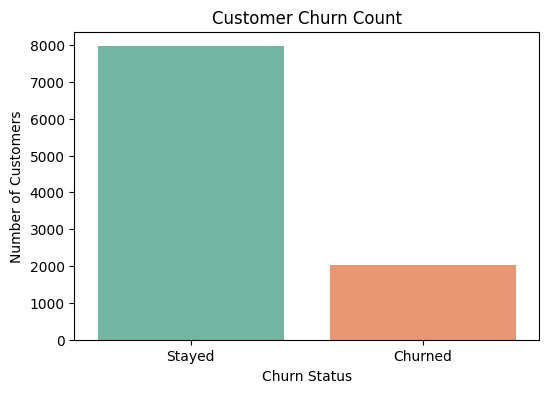

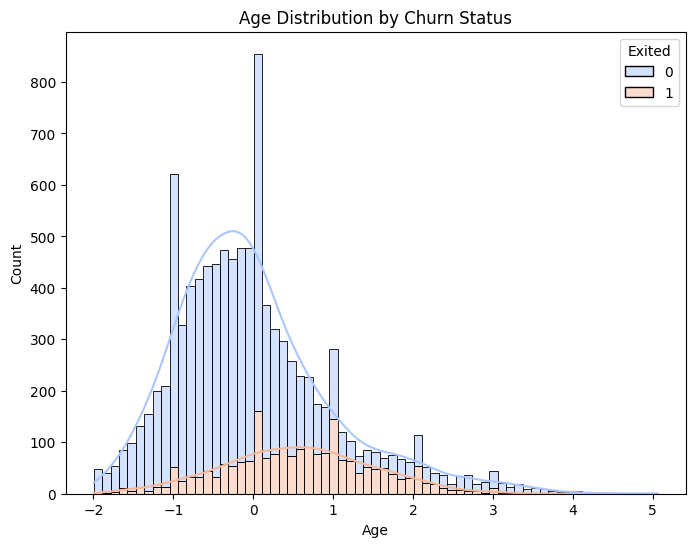

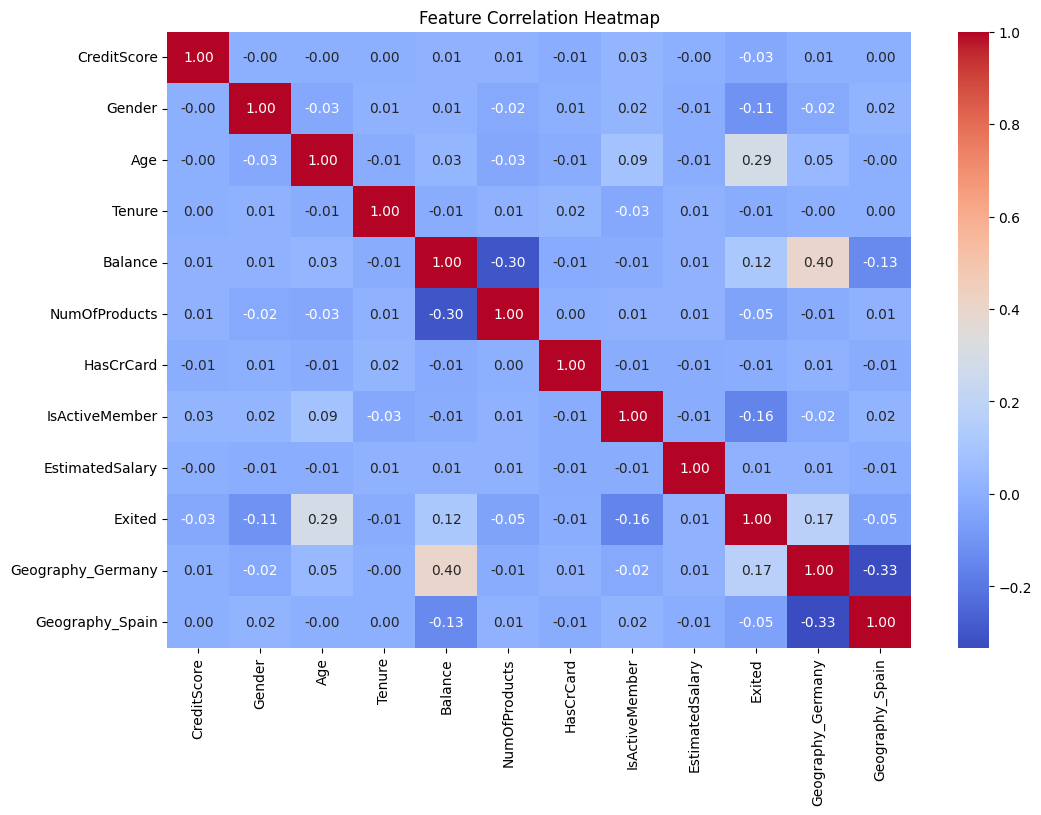

In [ ]:
# --- Start of EDA Section ---

# 1. Bar plot: Churn Count
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Customer Churn Count')
plt.xticks([0,1], ['Stayed', 'Churned'])
plt.xlabel('Churn Status')
plt.ylabel('Number of Customers')
plt.show()

# 2. Histogram: Age Distribution by Churn
plt.figure(figsize=(8,6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True, palette='coolwarm', multiple="stack")
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# 3. Heatmap: Feature Correlation
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

# --- End of EDA Section ---


*6) Splitting the dataset into train and test*

In [ ]:
# 6. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


*7)Building the model*

In [ ]:
# 7. Model Building
# Using Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

*8)Predictions and Evaluations*


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000


=== Confusion Matrix ===


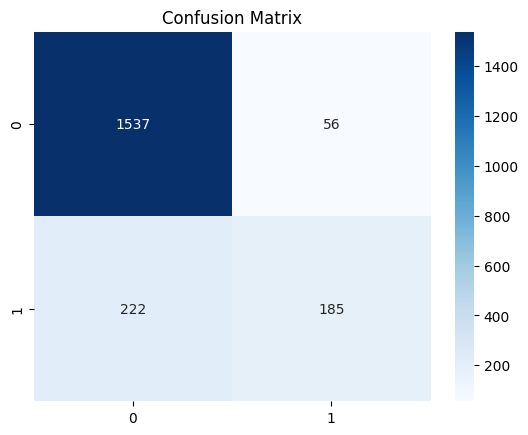


=== ROC-AUC Score ===
ROC-AUC Score: 0.8531


In [ ]:
# 8. Predictions and Evaluation
y_pred = rfc.predict(X_test)

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))



print("\n=== Confusion Matrix ===")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

print("\n=== ROC-AUC Score ===")
roc_auc = roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.4f}")


*9)Feature Importance*

<ipython-input-37-b7b2c0f732c8>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


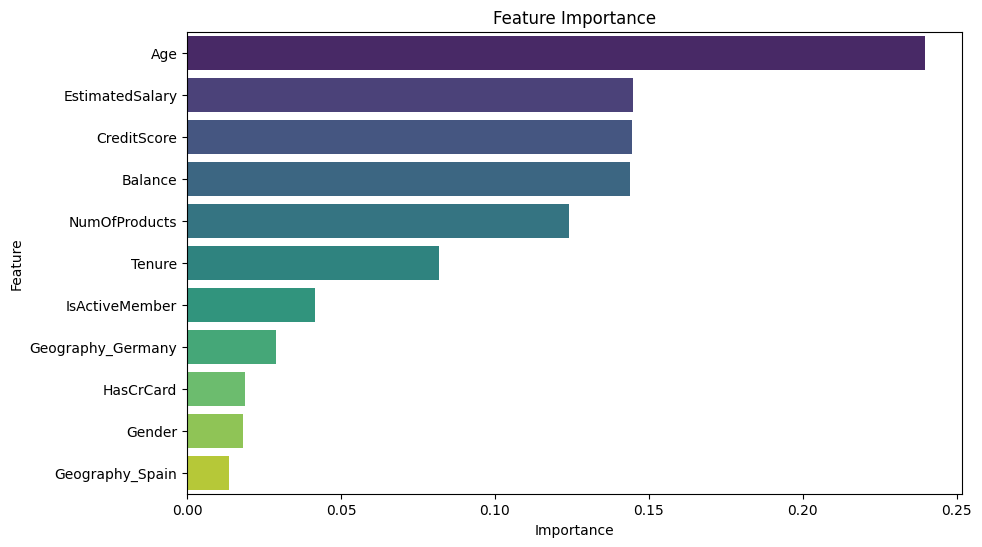

In [ ]:

# 9. Feature Importance
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rfc.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Feature Importance')
plt.show()

*10)Hyperparameter Tuning*

Fitting 3 folds for each of 12 candidates, totalling 36 fits

=== Best Hyperparameters ===
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

=== Final Classification Report After Tuning ===
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1593
           1       0.82      0.45      0.58       407

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



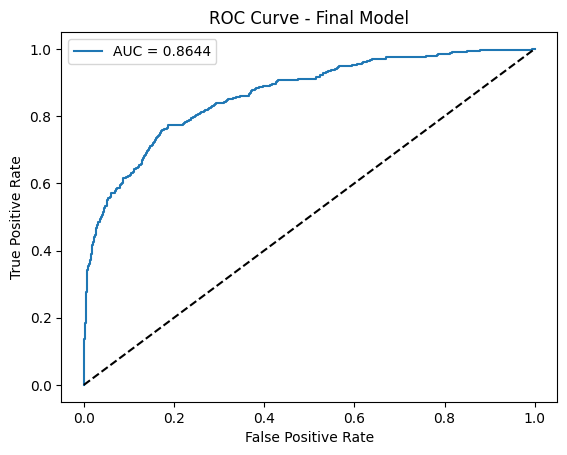

In [ ]:
# 10. (Bonus) Hyperparameter Tuning - Innovation & Creativity
# Only a small tuning to improve model performance
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=3,
                           scoring='roc_auc',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

print("\n=== Best Hyperparameters ===")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_

# Final evaluation with best model
final_pred = best_model.predict(X_test)
print("\n=== Final Classification Report After Tuning ===")
print(classification_report(y_test, final_pred))

# Final ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, best_model.predict_proba(X_test)[:,1]):.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Final Model')
plt.legend()
plt.show()